# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [16]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [17]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [19]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [392, 132, 245]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,518,4180,3600,659,122,654
1,14903,2032,2479,576,955,328
2,3062,6154,13916,230,8933,2784


Chosen samples of wholesale customers dataset:


In [21]:
two5  = [3127.750,  1533.000,  2153.000,   742.250,  256.750,   408.250]
five0 = [8504.000,  3627.000,  4755.500,  1526.000,  816.500,   965.500]
sev5  = [16933.750,  7190.250, 10655.750,  3554.250, 3922.000,  1820.25] 
print "Total 25th percentile mark: ", sum(two5)
print "Total 50th percentile mark: ", sum(five0)
print "Total 50th percentile mark: ", sum(sev5)
proportions = [ [sum(samples.iloc[i])] + [100.*purchase/sum(samples.iloc[i]) for purchase in samples.iloc[i]] for i in range(3)]
breakdown = pd.DataFrame(proportions, columns = ["Totals"] + ['%'+ key for key in samples.keys()] ) 
display(breakdown)

,Totals,%Fresh,%Milk,%Grocery,%Frozen,%Detergents_Paper,%Delicatessen
0,9733,5.322100,42.946676,36.987568,6.770780,1.253468,6.719408
1,21273,70.055939,9.552014,11.653269,2.707658,4.489259,1.541861
2,35079,8.728869,17.543259,39.670458,0.655663,25.465378,7.936372


Total 25th percentile mark:  8221.0
Total 50th percentile mark:  20194.5
Total 50th percentile mark:  44076.25


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
       Index 392 is way below the 25th percentile in Fresh puchases, just above it for Delicatessen, and just below it for Frozen. It is at  
the 50th percentile for Milk and between the 50th and 25th percentile for Grocery. As can be seen by the breakdown above these account for 80% of  
its total purchases. Since its total purchases were a mere 9733 mu (less than half than those of index 132) we see it is the smallest customer of  
the sample of three and a small client overall. Maybe index 392 specializes in making milk based food items like cheese cakes or custards or  
milkshakes.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
       Index 132's purchases mostly entail fresh products, accounting for 70 percent of its purchases. It is still below the 25th percentile  
relative to the rest of the population in this category. It is in between the 50th and 25th percentile for Milk and Grocery, at the 50th for  
Detergentsd/Paper and well below the 25th for Delicatessen. Again from the breakdown above, its total purchases are almost equal to those of a  
customer that would be at the 50th percentile mark. This indicates that index 132 is a medium sized purchaser. Since the bulk of its purchases  
are for fresh products, with a good amount of Grocery, and being at the 50th percentile for Detergents/Paper, it could mean that index 132 is a  
restaurant preparing fresh food (not frozen, way below the 25th) and requiring lots of cleaning. It could also be a small market convenience store.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
       40% of Index 245's purchases are comprised of Grocery items, with detergents/paper at 25% and milk at 17.5%. All other categories are  
represented by at least 8% of total purchases except for frozen items, which come at a negligible 0.7%. Its purchases seem somewhat more evenly  
distributed compared  to the other two buyers. It just below the 25th percentile for Fresh, and way below it on Frozen items. It is close to the  
75% on Milk and above it for Grocery. It is at the 50th percentile for Detergent/Paper, but its purchases here are an order of magnitude higher  
than index 132's, even though they both fall in the 50th. This feature might be a good indicator of the type of the client. Delicatessen is also  
solidly above the 75th percentile. This profile may indicate that it is some sort of general grocery retailer. A general store would sell lots of  
groceries, milk, and cleaning products. Its lack of frozen food purchases is curious. Maybe it is using a different wholesaler for that particular  
category.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split

for feature in ['Fresh', 'Grocery', 'Frozen', 'Detergents_Paper']:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([feature], axis=1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size = .25, random_state = 42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 10)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print feature, ": ", score
    print

Fresh :  -0.38626533715

Grocery :  0.695471477255

Frozen :  -0.282770401906

Detergents_Paper :  0.470169003888



### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I chose the features Grocery, Detergents/Paper, Frozen and Fresh, because they were the ones seeming relevant in Question 1 and I was curious if  
they were predictable by the other features. As can be seen above by the `R^2` scores:

Grocery:  0.695471477255  
Detergents_Paper:  0.470169003888

Grocery and Detergents seem to be predicted by the purchase amounts of all other features excluding themselves.

Whereas with negative scores; 

Frozen:  -0.282770401906  
Fresh:   -0.38626533715 

indicate that Frozen and Fresh foods can't even be fit by the DecisionTree. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

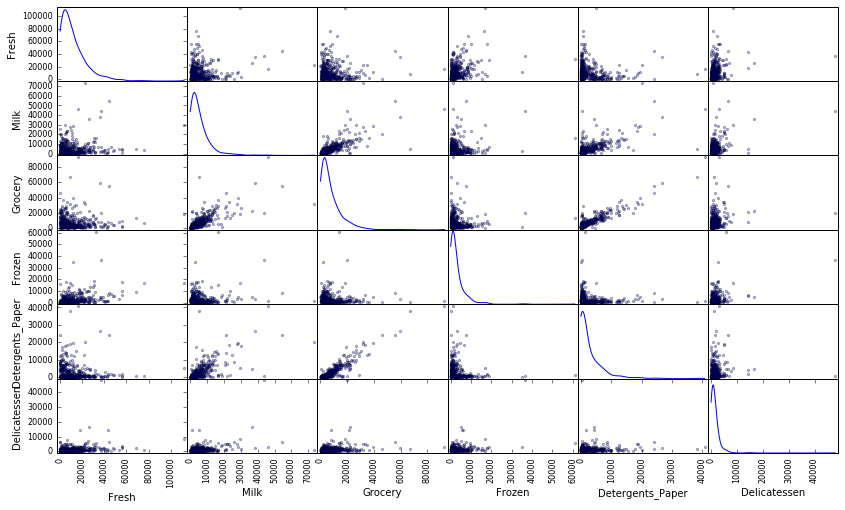

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
Detergents and Grocery purchases are pretty clearly positively correlated. This might explain why the tree model was able to predict them with  
relatively high R^2 scores. Milk and Grocery are also somewhat positively correlated. You could say the same aboutt Milk and Detergent, but the  
correlation is even weaker still. The distributions of all features are right (positively) skewed, with data packed towards the left.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

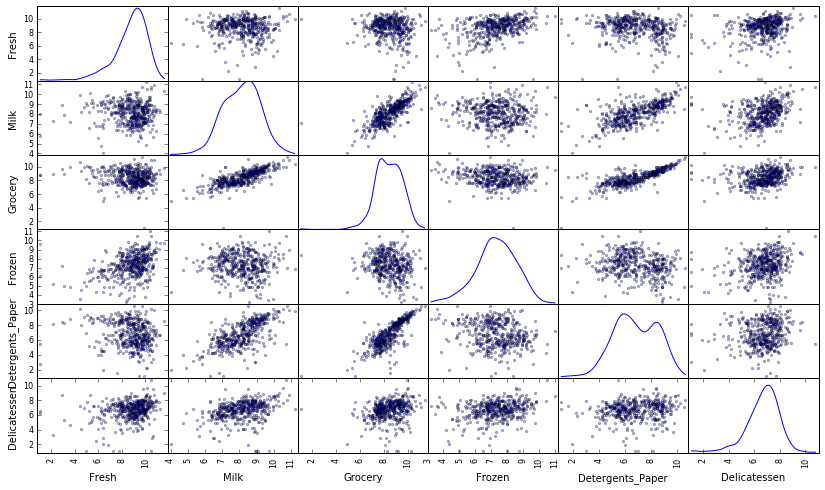

In [27]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde'); 

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [28]:
# Display the log-transformed sample data
display(samples)
print
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.249975,8.338067,8.188689,6.490724,4.804021,6.483107
1,9.609318,7.616776,7.815611,6.356108,6.861711,5.793014
2,8.026824,8.724858,9.540795,5.438079,9.097508,7.931644


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,518,4180,3600,659,122,654
1,14903,2032,2479,576,955,328
2,3062,6154,13916,230,8933,2784


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [78]:
# For each feature find the data points with extreme high or low values
repeats = {}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    #print "Data points considered outliers for the feature '{}':".format(feature)
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

    indices = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.get_values()
    for i in indices:
	if i not in repeats:
	    repeats[i] = 1
	else:
	    repeats[i] += 1



0 indices flagged as outlying at least 4 time(s).
Outlying Indices:
[]

------------------------------



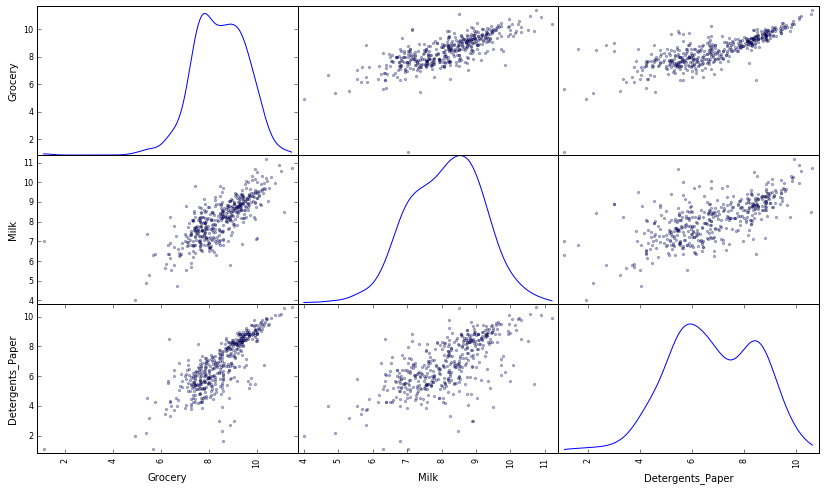

1 indices flagged as outlying at least 3 time(s).
Outlying Indices:
[154]

------------------------------



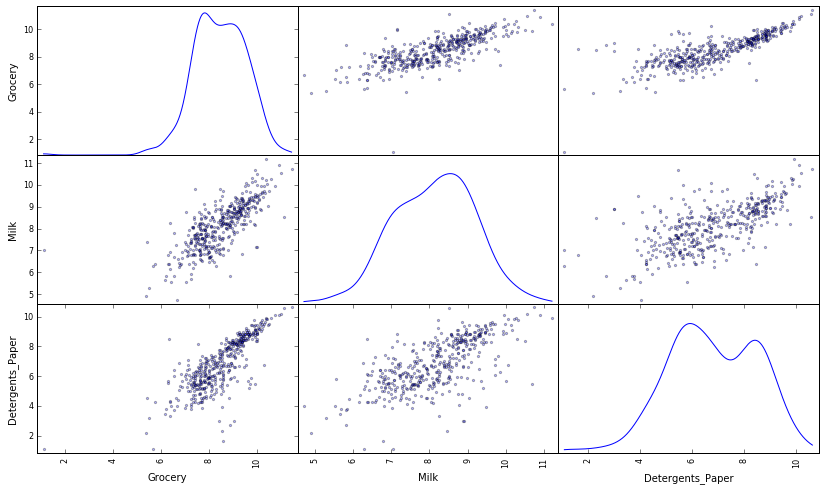

5 indices flagged as outlying at least 2 time(s).
Outlying Indices:
[128, 154, 65, 66, 75]

------------------------------



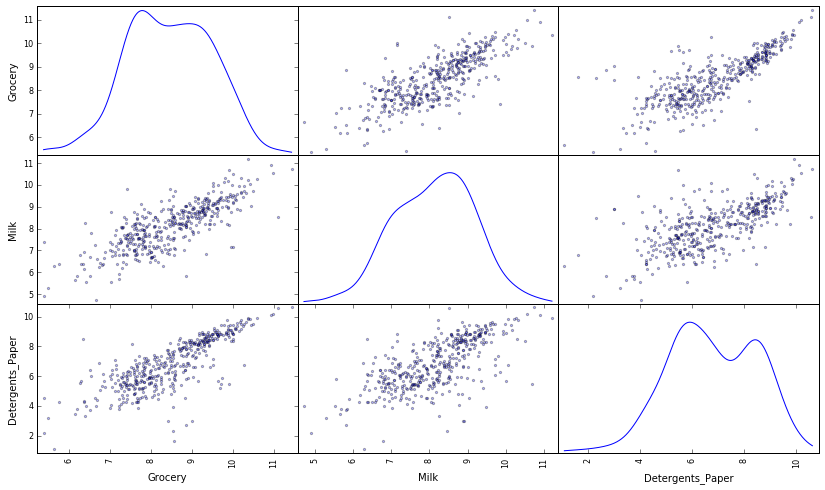

42 indices flagged as outlying at least 1 time(s).
Outlying Indices:
[128, 193, 264, 137, 142, 145, 154, 412, 285, 161, 420, 38, 171, 429, 175, 304, 305, 439, 184, 57, 187, 65, 66, 203, 325, 289, 75, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109, 183]

------------------------------



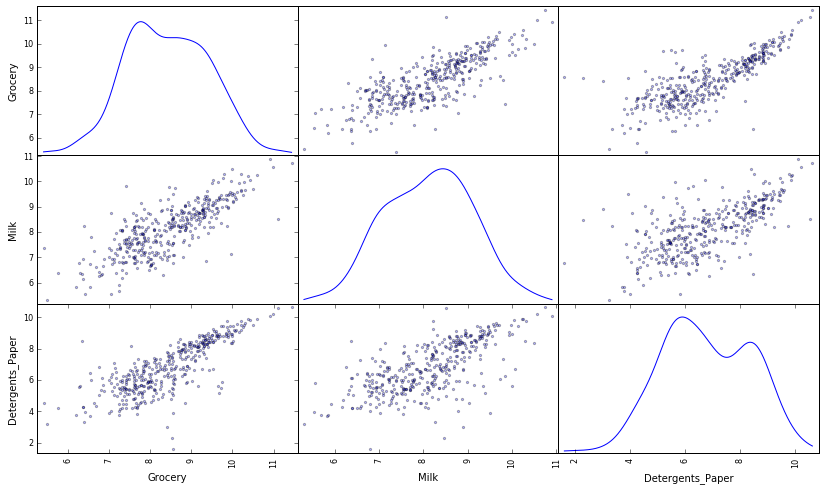

In [86]:
import matplotlib.pyplot as plt
# OPTIONAL: Select the indices for data points you wish to remove
##

# Singling out correlating features for observation
correlations = log_data[ ['Grocery', 'Milk', 'Detergents_Paper'] ]
for max_outlies in range(1,5):
    
    outliers = [i for i in repeats if repeats[i] >= max_outlies]

    # Remove the outliers
    corrs = correlations.drop(correlations.index[outliers]).reset_index(drop = True) 

    # Display correlating features without outliers    
    pd.scatter_matrix(corrs, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
    plt.show()

    print "{} indices flagged as outlying at least {} time(s).".format(len(outliers), max_outlies) 
    print "Outlying Indices:"
    print outliers
    print
    print '------------------------------\n'



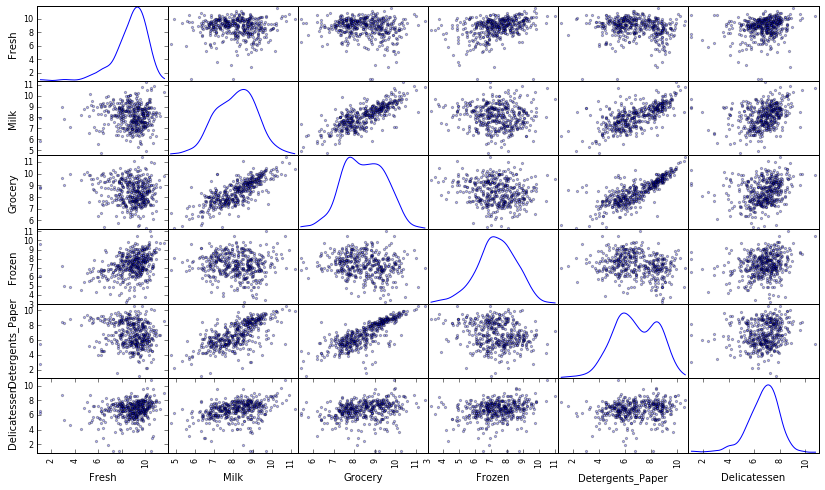

In [87]:

# Finall max_outlies setting
max_outlies = 2
outliers = [i for i in repeats if repeats[i] >= max_outlies]

# Removing outliers from log_data
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
       I tried varying degrees of "outlyingness", the strictest being if a given index was flagged as an outlier for all six dimensions, and the  
weakest being if it was flagged at least once, for some particular dimension (i.e. 1 <= max_outlies <=6 ). After plotting good_data for max_outlies  
1-4 I settled for max_outlies = 2 (rather arbitrarily). Setting it to 1 made the above table of graphs too diffuse, some of the correlations  
apparent in log_data seemed to wash out. After inspecting the above tables of graphs, it appeared to me that the feature pairs I  felt were   
positively correlated in log_data, became even more so after removing indices flagged as outliers for 2 or more features, i.e. max_outlies = 2.  
This is especially true for the Milk-Grocery cells. When I strengthened the criteria for being an outlier (by setting max_outlies > 2) the table  
of graphs for good_data and for log_data began to look almost the same. This makes sense because fewer indices are being excluded, so good_data  
and log_data are almost the same data. After these observations I removed the 5 outlying indexes listed for the max_outlies = 2 iteration seen above.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [120]:
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)
# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)


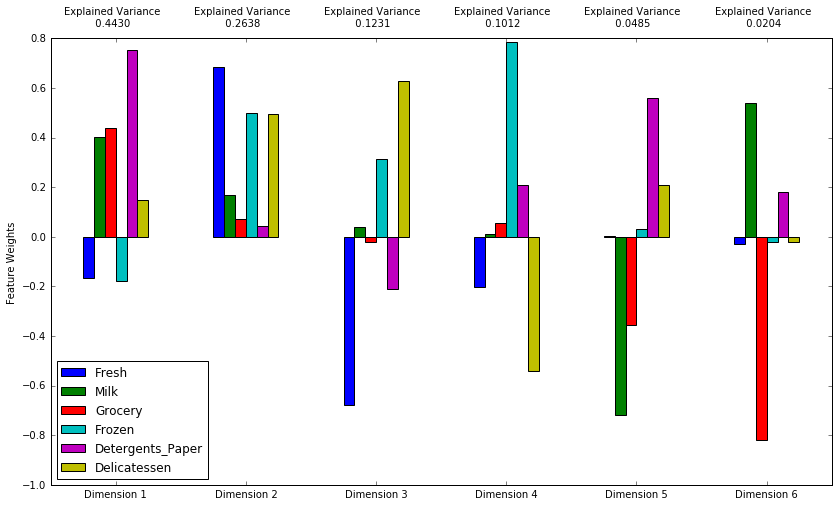

In [121]:
# Generate PCA results plot 
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

In [122]:
comps = pd.DataFrame(pca.components_[:4], index = ["Comp {}".format(k+1) for k in range(4)], columns = data.columns )
display(comps)

# evr = pca.explained_variance_ratio_
# print "Explained Variance of Dimensions:\n"
# print "First and second: ", evr[0] + evr[1]
# print "First through fourth: ", sum([evr[k] for k in range(4)])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Comp 1,-0.167464,0.401439,0.438111,-0.178210,0.751426,0.149871
Comp 2,0.685935,0.167228,0.070729,0.500542,0.042444,0.494147
Comp 3,-0.677389,0.040205,-0.019533,0.315043,-0.211702,0.628551
Comp 4,-0.204293,0.012811,0.055676,0.785449,0.209614,-0.542340


**Answer:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
       Component 4 clearly points almost exclusively in the direction of the Frozen, with a coefficient of 0.79 in this feature. It poinst away  
from Delicatessen and Fresh, with coeficients of -0.54 and -0.204 in these directions respectively. Detergent/Paper holds a small 0.21  
contribution. All other features less than 0.09 away from being zero.   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
       The greatest positive contribution to Component 3 comes from Delicatessen at 0.63, followed by Frozen at 0.315. It heavily points away from  
Frozen with a coeficient of -0.68. Other features have small representations in comparison. So this component says _not_ Frozen and Delicatessen.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
       Components 1 and 2 tend to represent a more even mix of puchase directions and they seem to almost complement each other. Component 1  
strongly represents Detergent, Grocery and Milk with positive coeficients, 0.75, 0.44, and 0.40 respectively. Delicatessen holds a mere 0.15, while  
Frozen and Fresh have small negative values of -0.18 and -0.17. In somewhat of a contrast component 2  has a relatively large positive 0.50 Frozen  
coeficient, with Fresh being actually its largest positive coeficient at 0.69. Its other features hover closer to zero, but are all positive.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [123]:
# Display sample log-data after having a PCA transformation applied 
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.9955,-2.3169,1.7454,-0.4569,-1.2462,0.0669
1,-0.5443,-0.4806,-1.4637,-0.4733,0.4137,0.2771
2,3.0855,-0.5666,0.2008,-1.4521,0.6644,-0.1093


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [124]:
from sklearn.decomposition import PCA
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components = 2).fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [125]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.9955,-2.3169
1,-0.5443,-0.4806
2,3.0855,-0.5666


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

From what I've been [reading](https://en.wikipedia.org/wiki/Cluster_analysis#Centroid-based_clustering) and [watching](https://www.youtube.com/watch?v=REypj2sy_5U&list=PLBv09BD7ez_4e9LtmK626Evn1ion6ynrt), K-Means clustering can be thought of as a special case of Gaussian Mixture Model where,  
after calculating $P(M_k|x_i)$ for each mixture $M_k$, one then gives a probability of 1 to the mixture that yielded the highest probability, and   
a probability of 0 to the rest. This means that $x_i$ would be assigned to the nearest centroid $\mu_k$, which is what K-means does. Recalculating  
$\mu_k$ would similarly reduce to simply averaging the members of a particular cluster $M_k$, again what K-means does. From this perspective  
K-Means is a version of GMM where points are strictly assigned to a cluster (probability 1) rather than given a less commited "soft" assignment.  
GMM entails more complex (but in some ways more expressive) calculations. 

**Advantages**

K-Means: 

* Simplicity of the algorithm. Only intuitive vector arithmetic computations are being performed.

* The computational simplicity I assume is what makes it highly [scalable](http://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) (scroll to table under the graphs)

* It does not assume a particular distribution associated with the data. This might make it more "open minded"  
to whatever data it is exposed to, even if its not Gaussian. 

Gaussian Mixture: 

* For data of dimension greater than one, GMM will take in to account covariance of the features so  
the mixtures can tailor to the shape of data that is "diagonally" spread or oblong. If the underlying data  
is in fact suitably represented by Gaussian shape clusters, this might make the clustering more precise. 

* Again _if_ the underlying data is a patchwork of Gaussian distributions, GMM can find better  
defined boundaries between clusters than K-Means. For swathes of points between clusters, K-Means  
can be rather [arbitrary](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm#/media/File:ClusterAnalysis_Mouse.svg)
in its delineation of a boundary, whereas GMM can infer more a reasonable partition.

From what I have understood, the main reasons _not_ to use GMM would be if the data in question was of a very large size, or if the data in  
question was not modeled by a motley of Gaussian distributions. It seems in our case that neither of these things is a concern. Our data set  
is relatively small, n = 400, _and_ the log scaling actually exposed each feature to be pretty much normally distributed. Since we can gain,  
as mentioned above, clusters with more freedom to shape themselves, we could get a more accurate clustering. For these reasons I think that  
GMM is a better choice for this problem. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [126]:
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(6,1,-1):

    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components = k).fit(reduced_data)
    #clusterer = KMeans(n_clusters = k).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_
    #centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print "{} clusters: {}".format(k, score)

4 clusters: 0.333171888525
3 clusters: 0.370684291825
2 clusters: 0.411818864386


6 clusters: 0.275335552086
5 clusters: 0.295441470747


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
The highest score of 0.41 was obtained for k = 2 clusters. K-Means didn't fair much better, was slightly higher at 0.43 for k = 2 (not shown). 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

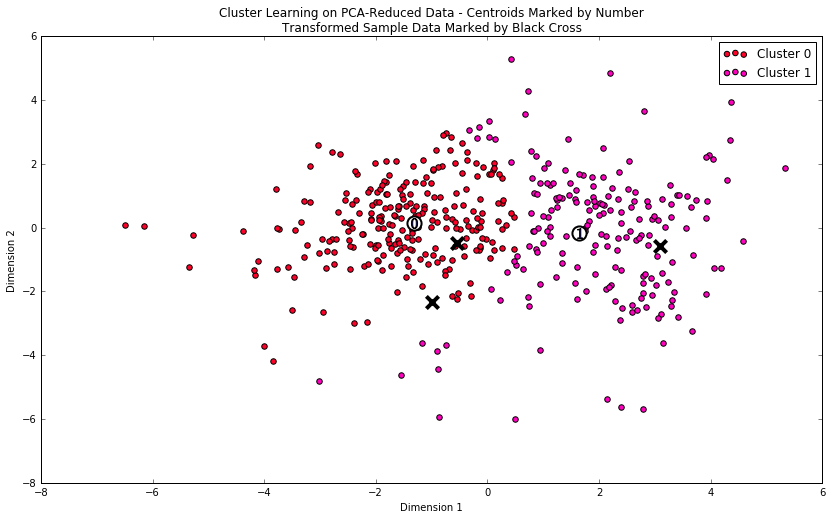

In [127]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [128]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)
# TODO: Exponentiate the centers
true_centers = [np.exp(center) for center in log_centers]

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [133]:

sg0 = [8812.0,  2052.0,   2689.0,  2058.0, 337.0, 712.0]
sg1 = [4316.0,  6347.0,   9555.0,  1036.0, 3046.0, 945.0]
print  "Total Segment 0: ", sum(sg0)
print  "Total Segment 1: ", sum(sg1)
print  sum(sg1)/sum(sg0)
print [100.*purchase/sum(sg0) for purchase in sg0]

Total Segment 0:  16660.0
Total Segment 1:  25245.0
1.51530612245
[52.89315726290516, 12.316926770708283, 16.140456182472988, 12.352941176470589, 2.0228091236494596, 4.2737094837935174]


**Answer:** 
The average customer assigned to Cluster 0 is at the 75 percentile  for Milk (just below actually), Grocery, Frozen, and and well above the 50th  
for Detergents, I don't know if its appropriate to say maybe at the 70th for Detergents. This would tell me that there are less customers associated  
with Cluster 0, and indeed the Cluster above looks less dense. The center customer for Cluster 0 also spends 1.6 times more in total than  
than that of Cluster 1.  
The average customer assigned to Cluster 1 on the other hand is only barely above the 25th percentile for Detergents. It is at the 50th  
percentile for Fresh products and at the 25th for the rest of the categories. Fresh purchases constitute more than 50% of its total with  
Grocery, Milk, and Frozen hovering only between 10 and 15%. Overall this seems to point to a natural state of affairs, many smaller  
purchasers, and a separate and fewer number of larger purchasers. 

In [130]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [134]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,518,4180,3600,659,122,654
1,14903,2032,2479,576,955,328
2,3062,6154,13916,230,8933,2784


In [135]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**
"Sample point 2" or as originally refered to, index 245, is a large client with total purchases of 35079 mu. This, plus the heavier proportion of  
Milk and Grocery purchases, clearly places it in Cluster 0. Again curiously, index 245 has very low frozen purchases, in that respect it is unlike  
the Cluster 0 center. Index 132 or "Sample point 1", is particularly representative of Cluster 1 in the sense that it so disproportionately  
favors Fresh purchases, something we saw in the "center" customer of that cluster. Index 392, "Sample point 0", is simply so small that it is  
clearly a member of Cluster 1. Curiously, it _was_ flagged as an outlier for "_at least one attribute_", though it didn't get culled under the  
stricter outlier requirement of max_outlies = 2.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

In [136]:
rows = good_data.shape[0]
real_good_data = good_data.applymap(np.exp)
total_Cluster0 = sum ( [sum(real_good_data.iloc[row]) for row in range(rows) if preds[row] == 0] )
total_Cluster1 = sum ( [sum(real_good_data.iloc[row]) for row in range(rows) if preds[row] == 1] )
print "Total business from Cluster 0: {} mu".format(total_Cluster0)
print "Total business from Cluster 1: {} mu".format(total_Cluster1)

Total business from Cluster 0: 6030435.0 mu
Total business from Cluster 1: 8442029.0 mu


**Answer:**  
From the graph above Cluster 1 seems much denser around its center, so its "average customer" characteristic to tend toward Fresh product purchases  
might be shared by many in the cluster. This would mean their stocks might need to be replenished at a faster rate, so that Cluster 1 would be  
more affected than Cluster 0 by a less frequent delivery rate. In contrast, deliveries to Cluster 0, since much larger, are most likely bulk  
deliveries and might not take place that often. From that point of view Cluster 1 would be more affected than Cluster 0. Since there are more  
customers in Cluster 1 there would be more savings to the distributor associated with a 3 day a week delivery service applied to Cluster 1.  
So I guess they would test it on Cluster 1 to see if a larger group of people can "tolerate" the disruption, so the distributer can reap greater  
savings. 

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**
It could divide the data into the two clusters and train learning algorithms on the two segments separately since each group might relate  
differently to the new feature. A good feature to have would be frequency purchases, or frequency of product delivery to that customer.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

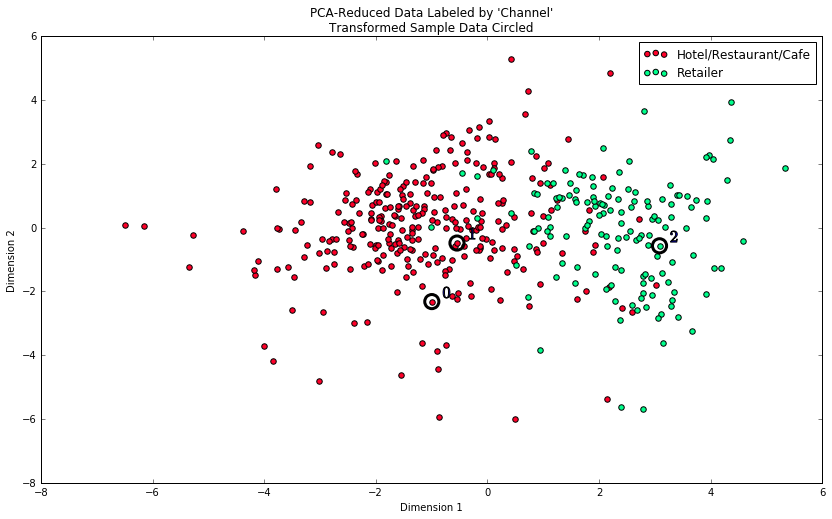

In [137]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
It pretty much exactly corresponds to the two class cluster deduced throughout the project. You could say that, for Dimension1, values less than  
-2 correspond almost exclusively with Hotel/Restaurant/Cafe customers. Values greater than 2 correspond almost exclusively to retail customers.  
These classifications are nicely consistent with the previously observed big vs small business split, if not my speculated categories for said  
businesses. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.